In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df= pd.read_csv('Data/Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9935 non-null   object 
 6   Age              9929 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Dropping Unnecessary Columns

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# Equal width  binning

In [11]:
df.Age.min()

np.float64(18.0)

In [12]:
df.Age.max()

np.float64(92.0)

#### Tips: Treat missing values beforehand binning

In [13]:
labels= ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
bins= [0, 20, 30, 40, 50, 60, np.inf]
df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Binned
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,41-50
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,41-50
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,41-50
3,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0,NaN
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,41-50


C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5568\2477973311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=labels)


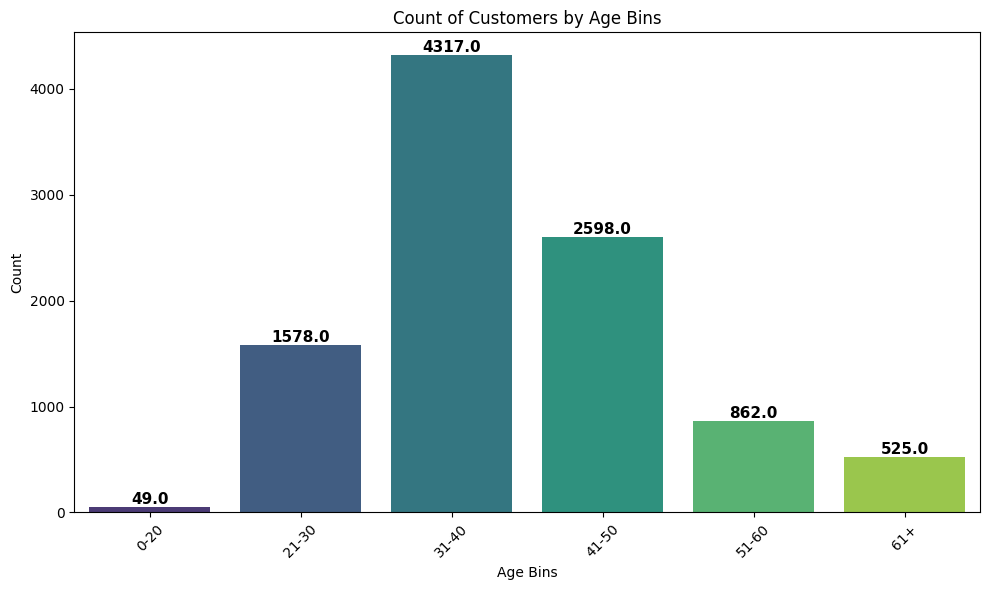

In [19]:
# making bar charts for binned data
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=labels)

# add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    
plt.title('Count of Customers by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Entropy binning

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5568\3146150885.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)


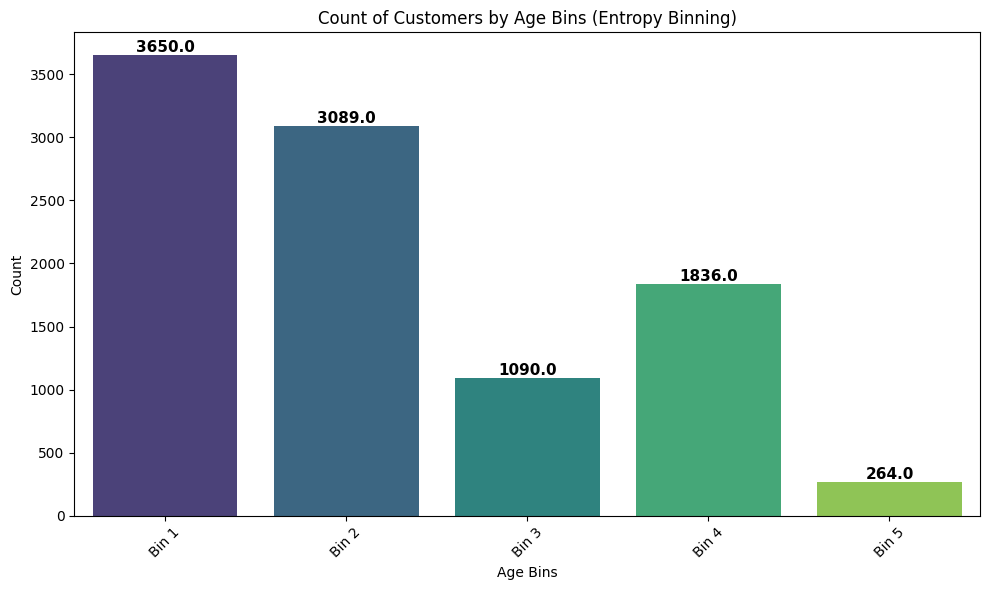

In [ ]:
# Entropy binning
from sklearn.tree import DecisionTreeClassifier
def entropy_binning(df, feature, target, max_bins=5):
    # Create a Decision Tree Classifier
    tree = DecisionTreeClassifier(max_leaf_nodes=max_bins, criterion='entropy')
    
    # Fit the model
    tree.fit(df[[feature]], df[target])
    
    # Get the bin edges
    bin_edges = np.sort(tree.tree_.threshold[tree.tree_.threshold != -2])
    
    # Create labels for the bins
    labels = [f'Bin {i+1}' for i in range(len(bin_edges) + 1)]
    
    # Create bins using pd.cut
    df[f'{feature}_Binned'] = pd.cut(df[feature], bins=np.concatenate(([df[feature].min()], bin_edges, [df[feature].max()])), labels=labels, include_lowest=True)
    
    return df

# Apply entropy binning to the 'Age' feature
df = entropy_binning(df, 'Age', 'Exited')
df.head()
# making bar charts for binned data
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)
# add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title('Count of Customers by Age Bins (Entropy Binning)')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Equal Frequency  Binning

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5568\1646288786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)


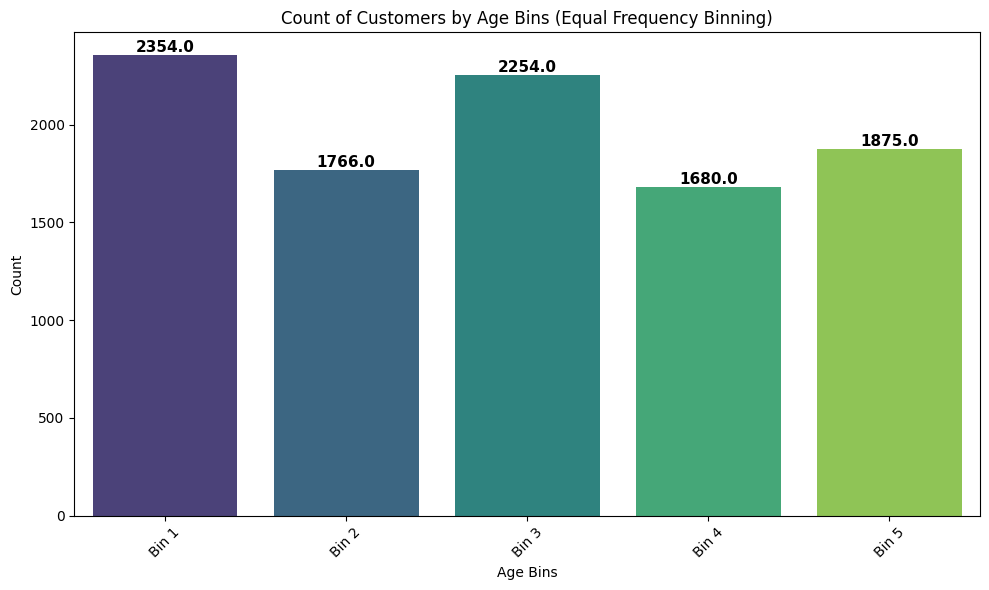

In [22]:
# equal frequency binning
def equal_frequency_binning(df, feature, num_bins):
    # Calculate the quantiles for the specified number of bins
    quantiles = np.linspace(0, 1, num_bins + 1)
    bin_edges = df[feature].quantile(quantiles).values
    
    # Create labels for the bins
    labels = [f'Bin {i+1}' for i in range(num_bins)]
    
    # Create bins using pd.cut
    df[f'{feature}_Binned'] = pd.cut(df[feature], bins=bin_edges, labels=labels, include_lowest=True)
    
    return df
# Apply equal frequency binning to the 'Age' feature
df = equal_frequency_binning(df, 'Age', num_bins=5)
df.head()

# making bar charts for binned data
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)
# add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title('Count of Customers by Age Bins (Equal Frequency Binning)')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

# Equal width binning

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5568\543540683.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)


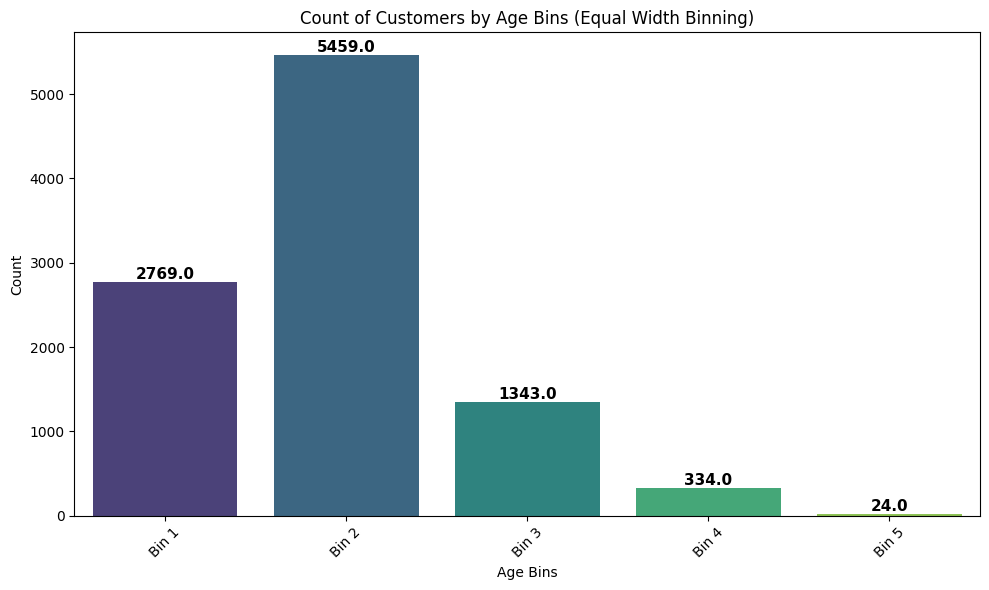

In [ ]:
    
def equal_width_binning(df, feature, num_bins):
    # Calculate the bin edges
    min_val = df[feature].min()
    max_val = df[feature].max()
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    
    # Create labels for the bins
    labels = [f'Bin {i+1}' for i in range(num_bins)]
    
    # Create bins using pd.cut
    df[f'{feature}_Binned'] = pd.cut(df[feature], bins=bin_edges, labels=labels, include_lowest=True)
    
    return df
# Apply equal width binning to the 'Age' feature
df = equal_width_binning(df, 'Age', num_bins=5)
df.head()

# making bar charts for binned data
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Binned', data=df, palette='viridis', order=df['Age_Binned'].cat.categories)
# add labels to the bars
for p in ax.patches:    
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title('Count of Customers by Age Bins (Equal Width Binning)')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()